Customer Analysis Round 2

# Show the dataframe shape.

In [1]:
# importing the libraries 

import numpy as np 
import pandas as pd 

In [2]:
!ls

Marketing_Customer_Analysis-2.ipynb marketing_customer_analysis.csv
Marketing_Customer_Analysis.ipynb


In [3]:
# import  marketing_customer_analysis.csv
DataMKT=pd.read_csv('marketing_customer_analysis.csv')

In [4]:
DataMKT

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [5]:
DataMKT.shape

(10910, 26)

# Standardize header names.


To standarize the headers we will do three tasks:
1. Using and underscore instead of a space.
2. Transforming all headers to lower case letters. 
3. Add a header for the first column

In [6]:
DataMKT.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [7]:
DataMKT.columns=DataMKT.columns.str.replace(" ","_")

In [8]:
def standarize_header(DataMKT):
    cols=[]
    for i in range (len(DataMKT.columns)):
        cols.append(DataMKT.columns[i].lower())
    DataMKT.columns=cols
        
    new_names= {'unnamed:_0':'Count'}
    DataMKT.rename(columns=new_names,inplace=True)
    DataMKT.columns=DataMKT.columns.str.replace(" ","_")
standarize_header(DataMKT)

In [9]:
DataMKT.columns

Index(['Count', 'customer', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employmentstatus',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [10]:
DataMKT.head(5)

,Count,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [11]:
new_names= {'unnamed:_0':'Count'}
DataMKT.rename(columns=new_names,inplace=True)

In [12]:
DataMKT.head(5)

,Count,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


# Which columns are numerical?


In [13]:
DataMKT.select_dtypes([np.number])

,Count,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


# Which columns are categorical

In [14]:
DataMKT.select_dtypes([object])

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


# Check and deal with NaN values.

In [15]:
DataMKT.isna().all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
10905    False
10906    False
10907    False
10908    False
10909    False
Length: 10910, dtype: bool

In [16]:
nulls_df=pd.DataFrame(round(DataMKT.isna().sum()/len(DataMKT),4)*100)

In [17]:
nulls_df

,0
Count,0.00
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00


In [18]:
#We'll first change the numerical value for it's mean 

median_claim=DataMKT['months_since_last_claim'].median()

In [19]:
median_claim

14.0

In [20]:
DataMKT['months_since_last_claim']=DataMKT['months_since_last_claim'].fillna(median_claim)

In [21]:
median_opencomplaints=DataMKT['number_of_open_complaints'].median()

In [22]:
DataMKT['number_of_open_complaints']=DataMKT['number_of_open_complaints'].fillna(median_opencomplaints)

In [23]:
DataMKT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Count                          10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [24]:
DataMKT=DataMKT.fillna('Unknown')

In [25]:
DataMKT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Count                          10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [26]:
DataMKT.head()

,Count,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown


In [27]:
#bring in new libraries 
import time
from datetime import date

In [28]:
# parse utc date field into DATE TYPE
DataMKT['effective_to_date'] = pd.to_datetime(DataMKT['effective_to_date'],errors='coerce')

In [29]:
DataMKT['effective_to_date_months']=pd.DatetimeIndex (DataMKT['effective_to_date']).month

In [30]:
DataMKT.head(5)

,Count,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_months
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1


In [31]:
effective_to_date_months2=[1,2,3]
Datacat=DataMKT[DataMKT.effective_to_date_months.isin(effective_to_date_months2)] #If 3 is not present it will not appear in the function

In [32]:
Datacat

,Count,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_months
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


# BONUS: Put all the previously mentioned data transformations into a function.

In [33]:
#Transformed the standarized header to a definition

# Lab | Customer Analysis Round 3

## Show DataFrame info

In [34]:
DataMKT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Count                          10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

## Describe DataFrame

In [35]:
DataMKT.describe()

,Count,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_months
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [36]:
DataMKT.head()

,Count,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_months
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1


## Show a plot of the total number of responses (for each response type - "Yes"/"No").

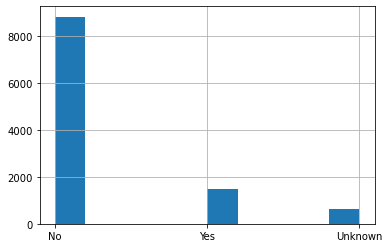

In [37]:
DataMKT['response'].hist();

## Show a plot of the rate of the response types by each Sales Channel.

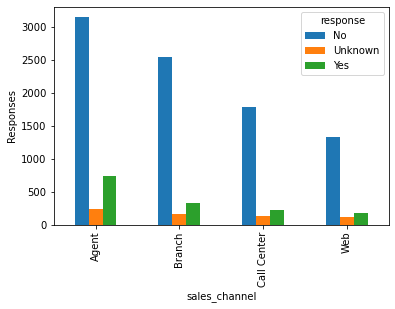

In [38]:
a = DataMKT.groupby('sales_channel')['response'].value_counts().unstack().plot.bar(ylabel='Responses')

#.plot.bar(ylabel='responses')

## Show a plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type. For the distribution plot, try to plot both kinds of responses in one chart (seaborn's histplot, using the 'hue' parameter is very convenient here).

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

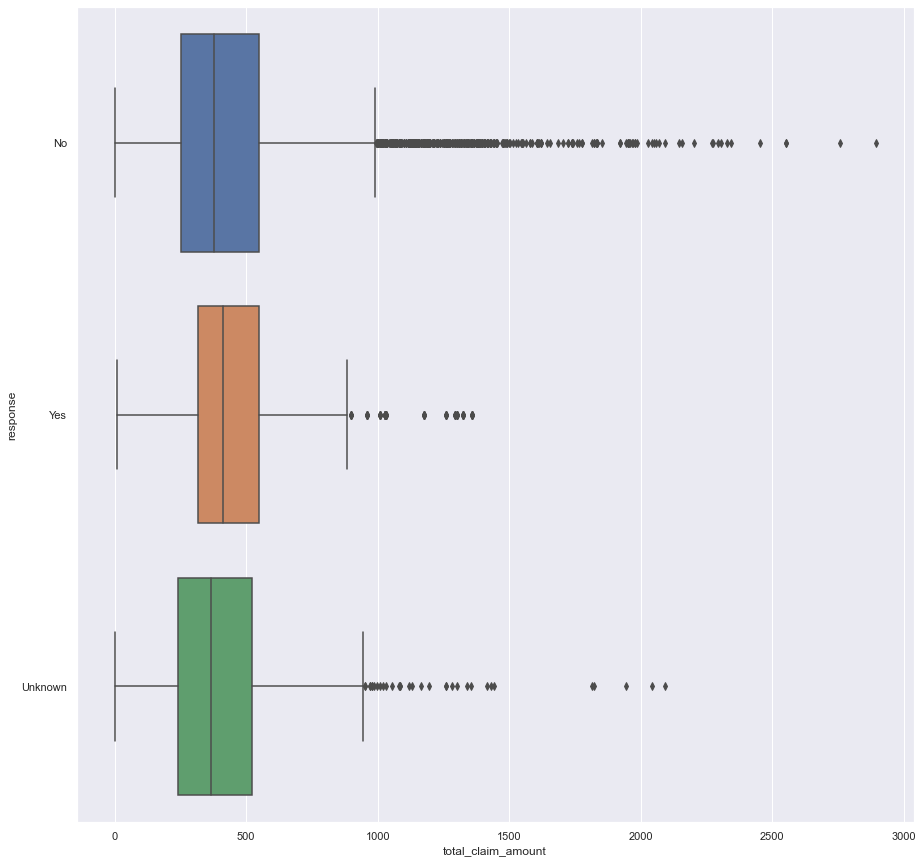

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set(rc={"figure.figsize":(15, 15)})
sns.boxplot(x='total_claim_amount', y='response', data=DataMKT)


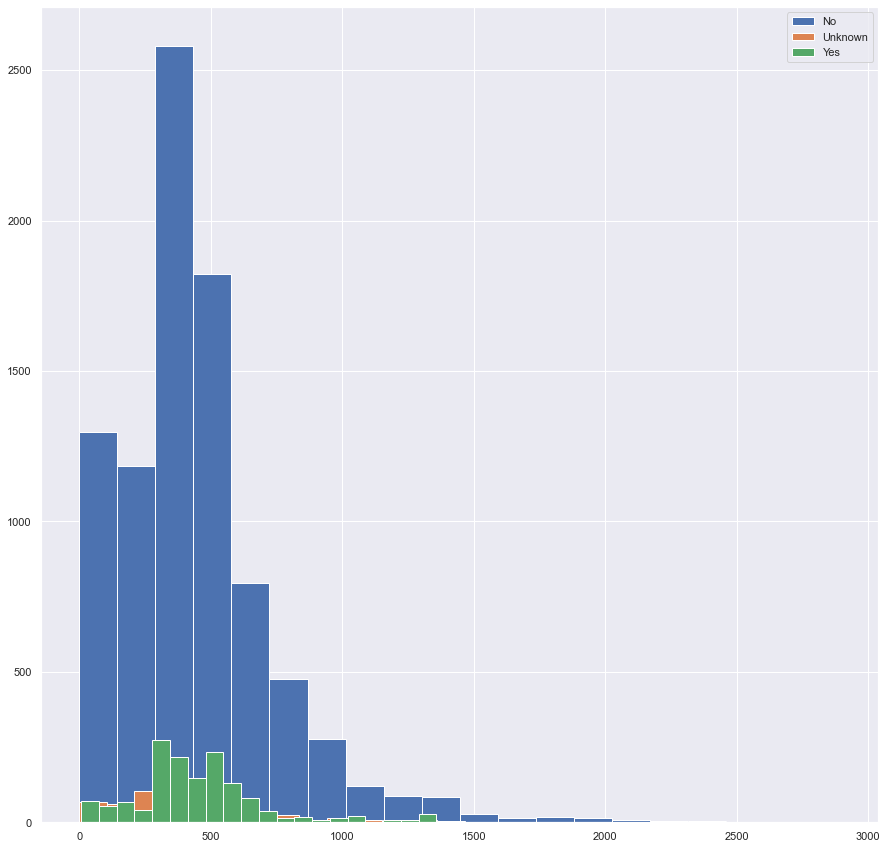

In [40]:
DataMKT.groupby('response')['total_claim_amount'].hist(bins=20,legend=True);


## Create similar plots like in the task before, but for Income.

<AxesSubplot:xlabel='income', ylabel='response'>

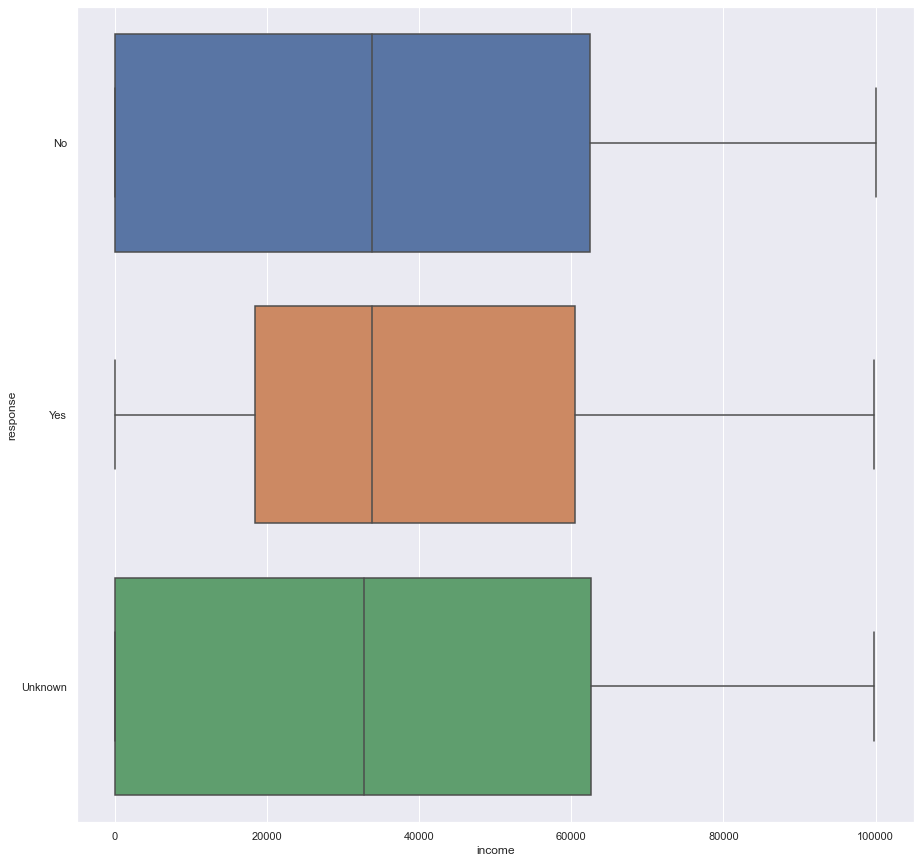

In [41]:
sns.set(rc={"figure.figsize":(15, 15)})
sns.boxplot(x='income', y='response', data=DataMKT)


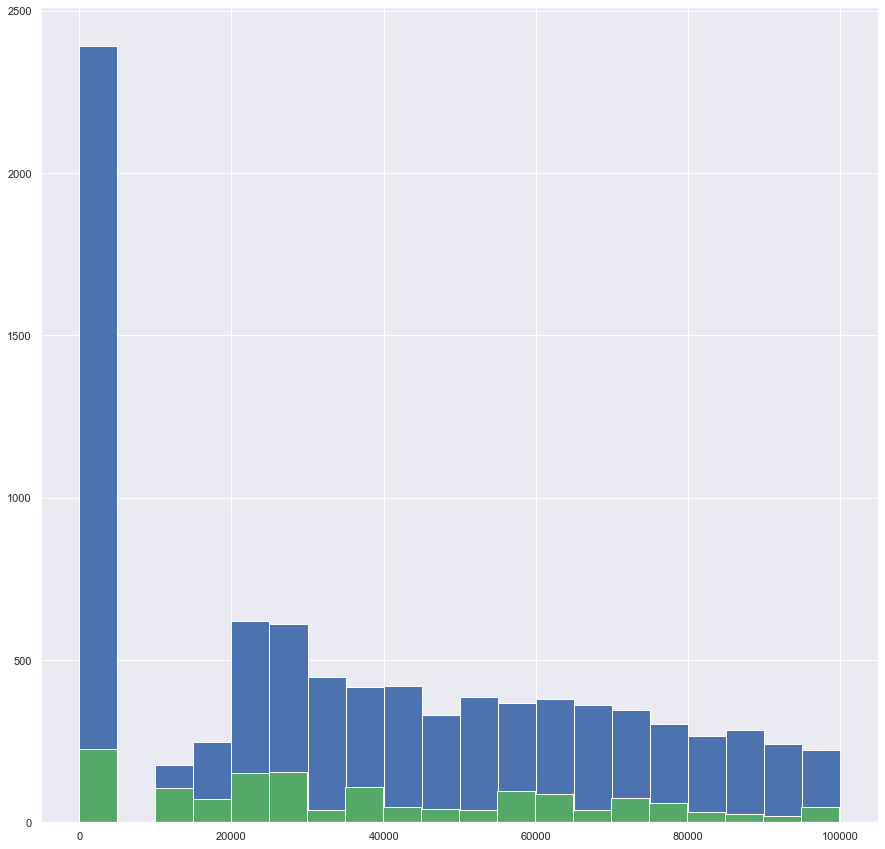

In [42]:
DataMKT.groupby('response')['income'].hist(bins=20);

## Create a scatterplot between Total Claim Amount and Income. Play around with the settings of the scatterplot (markersize, alpha level, ...) and in doing so try to identify more features within the data just visually. You can also try different seaborn plots. Check for example this link which explains how to avoid overplotting.

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
 

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

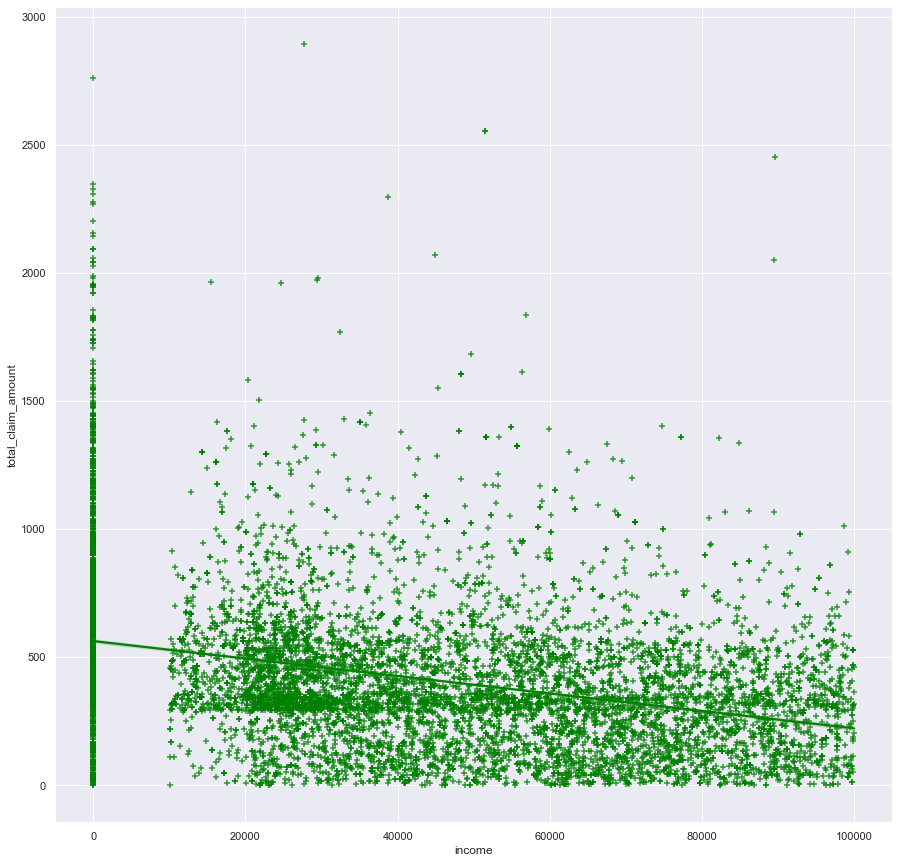

In [44]:
sns.regplot(data=DataMKT, x='income',y='total_claim_amount', color='green',marker='+')

# Lab | Customer Analysis Round 4

## Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [45]:
DataMKT.select_dtypes([np.number])

,Count,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_months
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,4,9025.067525,23675,117,14.0,31,0.0,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,14.0,40,0.0,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2


In [46]:
numerical=DataMKT.select_dtypes([np.number])

In [47]:
categorical=DataMKT.select_dtypes([object])

## Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical variables look like a normal distribution

IndexError: index 3 is out of bounds for axis 0 with size 3

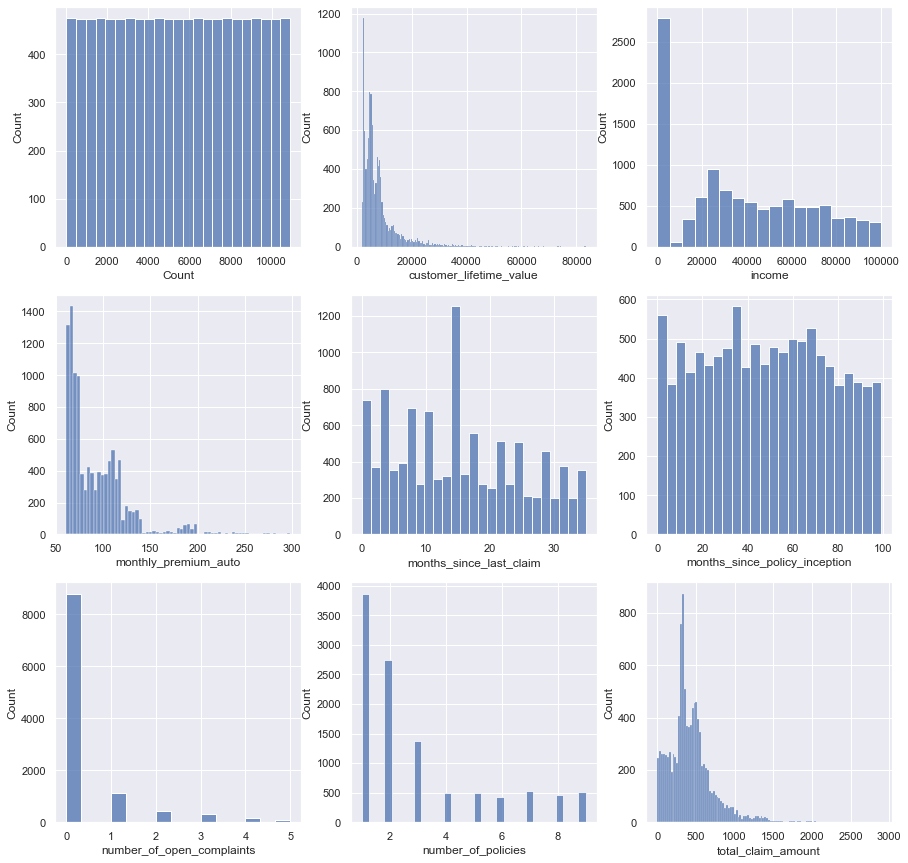

In [48]:
n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

for i, column in enumerate(numerical.columns):
    sns.histplot(numerical[column],ax=axes[i//n_cols,i%n_cols])
axes[2,2].set_axis_off()

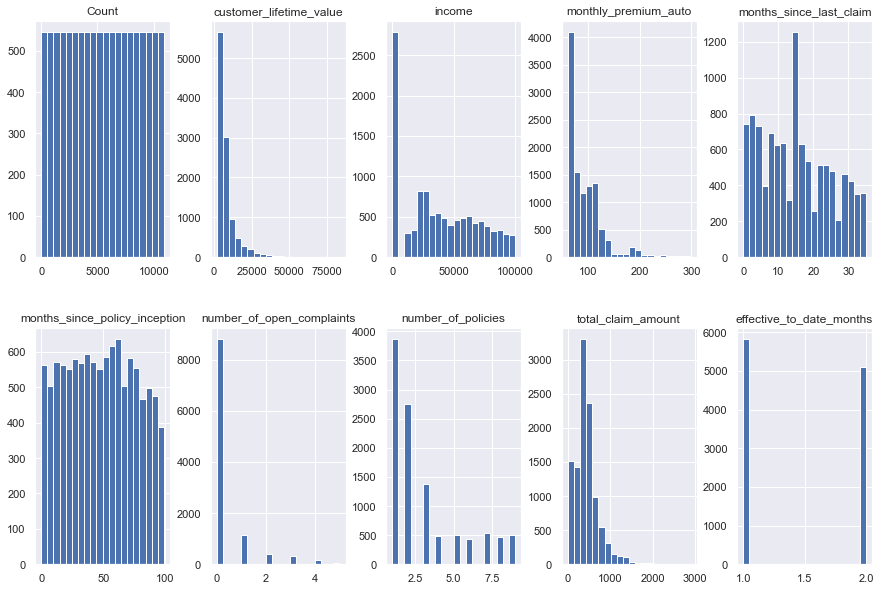

In [49]:
numerical.hist(figsize=(15,10),bins=20,layout=(2,5));

## Do the distributions for different numerical variables look like a normal distribution


No, they don't. They are either skewed or are data that present totally diferent distributions. 

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

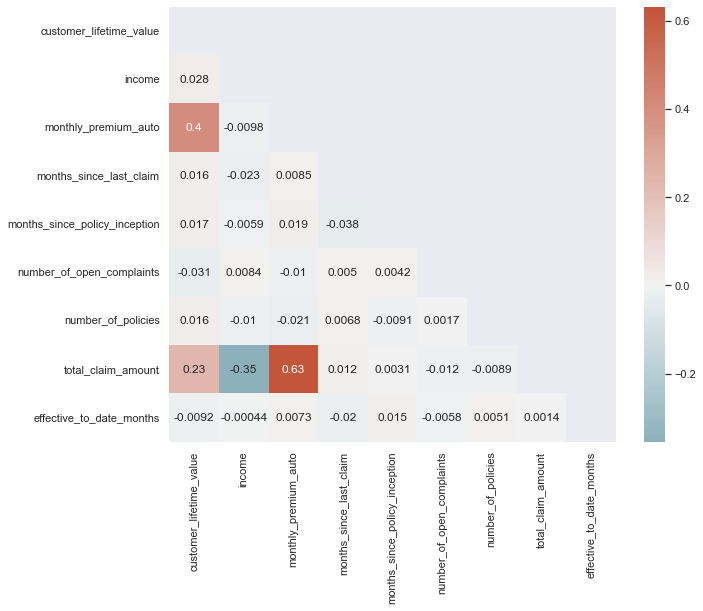

In [50]:
corr_data=numerical.drop(['Count'],axis=1) #dropping controln
corre_matrix=corr_data.corr()
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True);

# Lab Round 5 

In [51]:
#We drop the columns with lower correlation and that will less affect our Y variable (total_claim_amount)
datamkt=DataMKT.drop(['Count','effective_to_date','customer','number_of_policies','months_since_last_claim'],axis=1)

In [52]:
datamkt.select_dtypes(include=np.number)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_open_complaints,total_claim_amount,effective_to_date_months
0,4809.216960,48029,61,52,0.0,292.800000,2
1,2228.525238,0,64,26,0.0,744.924331,1
2,14947.917300,22139,100,31,0.0,480.000000,2
3,22332.439460,49078,97,3,0.0,484.013411,1
4,9025.067525,23675,117,31,0.0,707.925645,1
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,40,0.0,1214.400000,1
10906,5259.444853,61146,65,68,0.0,273.018929,1
10907,23893.304100,39837,201,63,0.0,381.306996,2
10908,11971.977650,64195,158,27,4.0,618.288849,2


In [53]:
#We delete the different outlier values

from scipy import stats
num_cols = list(datamkt.select_dtypes(include=np.number).columns)
DataMKT=datamkt[(np.abs(stats.zscore(datamkt[num_cols])) < 3).all(axis=1)]

In [54]:
DataMKT.reset_index()

,index,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,...,number_of_open_complaints,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_months
0,0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,...,0.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,2
1,1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,...,0.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,1
2,2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,...,0.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,...,0.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,...,0.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,10901,Washington,4547.892543,No,Premium,Bachelor,Employed,M,33531,Suburban,...,0.0,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,Unknown,1
10117,10902,California,3579.023825,No,Extended,High School or Below,Employed,F,28304,Suburban,...,2.0,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
10118,10904,Nevada,19228.463620,No,Basic,High School or Below,Unemployed,M,0,Suburban,...,0.0,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10119,10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,...,0.0,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


## Prediction model 

In [55]:
# we will be predicting Target_D : y= Target_D
# X will be everything else - but we might drop / process some columns 

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


y=DataMKT['total_claim_amount']
x=DataMKT.drop(['total_claim_amount'],axis=1)

In [56]:
x.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,effective_to_date_months
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,52,0.0,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Unknown,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,26,0.0,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Unknown,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,31,0.0,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,3,0.0,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,31,0.0,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,Unknown,1


In [57]:
x.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto',
       'months_since_policy_inception', 'number_of_open_complaints',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'vehicle_type',
       'effective_to_date_months'],
      dtype='object')

In [58]:
# We separate in two data sets so that we can transform categorical data into dummies

x_num=x.select_dtypes(include=np.number)
x_cat=x.select_dtypes(include=object)

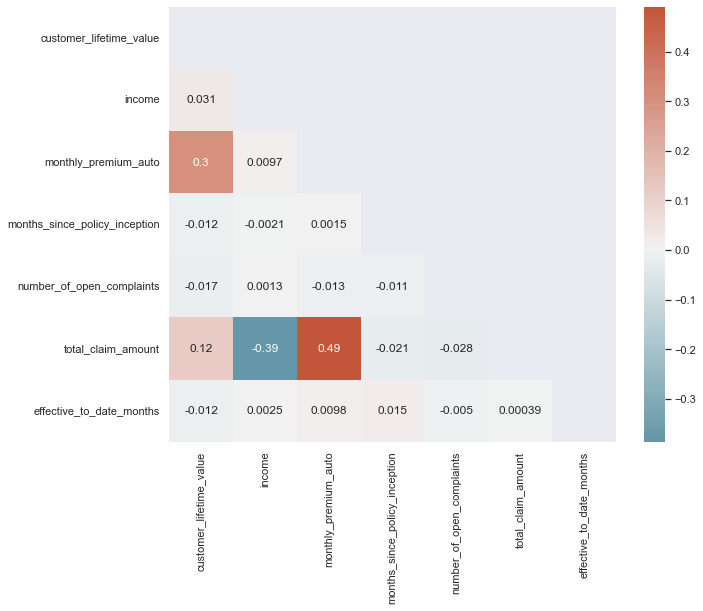

In [59]:
corre_matrix=DataMKT.corr()
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True);

In [60]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10121 entries, 0 to 10909
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             10121 non-null  object
 1   response          10121 non-null  object
 2   coverage          10121 non-null  object
 3   education         10121 non-null  object
 4   employmentstatus  10121 non-null  object
 5   gender            10121 non-null  object
 6   location_code     10121 non-null  object
 7   marital_status    10121 non-null  object
 8   policy_type       10121 non-null  object
 9   policy            10121 non-null  object
 10  renew_offer_type  10121 non-null  object
 11  sales_channel     10121 non-null  object
 12  vehicle_class     10121 non-null  object
 13  vehicle_size      10121 non-null  object
 14  vehicle_type      10121 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


In [61]:
#### One hot encoder 
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='error', drop='first').fit(x_cat)
X_encoded=pd.DataFrame(encoder.transform(x_cat).toarray())
X_encoded

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
10117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
X_encoded.shape

(10121, 48)

In [63]:
x_dummies=pd.get_dummies(x_cat, drop_first=True)

In [64]:
x_dummies

,state_California,state_Nevada,state_Oregon,state_Unknown,state_Washington,response_Unknown,response_Yes,coverage_Extended,coverage_Premium,education_College,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_Unknown,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_Unknown,vehicle_type_Unknown
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
10902,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
10904,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
10906,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [65]:
#### ordinal encoding 
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
oe.fit(x_cat)
x_ordinal=oe.transform(x_cat)

In [66]:
x_cat.head(3)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Unknown
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Unknown
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A


In [67]:
x_ordinal

array([[0., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [5., 0., 0., ..., 3., 1., 0.],
       ...,
       [2., 0., 0., ..., 2., 1., 0.],
       [3., 0., 0., ..., 0., 1., 0.],
       [4., 1., 0., ..., 3., 1., 1.]])

## Standarization of variables

In [68]:
#We standarize the numerical variables through the standard scaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x_num)

In [69]:
X_final=pd.concat((x_num,x_dummies),axis=1)

In [70]:
X_final.shape

(10121, 54)

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3, random_state=40)

In [72]:
lm=linear_model.LinearRegression() #configure model 
model=lm.fit(X_train,y_train)

In [73]:
preds=lm.predict(X_test)

In [74]:
preds

array([410.27844172, 865.44377803, 177.74943169, ..., 468.49115237,
        31.70609813, 672.80813381])

## Evaluate the model - r2 , mse

In [75]:
r2_score(y_test,preds) # true, predictions

0.7550746378958579

In [76]:
mean_squared_error(y_test, preds)

13248.133800126021